Let’s investigate whether we can confirm the connection between model complexity
and generalization that we discussed earlier. We will do this on the real-world Breast
Cancer dataset. We begin by splitting the dataset into a training and a test set. 
we evaluate training and test set performance with different numbers of neighbors

In [2]:
import sys
!{sys.executable} -m pip install numpy scikit-learn pandas matplotlib mglearn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn
import warnings 
warnings.filterwarnings("ignore")

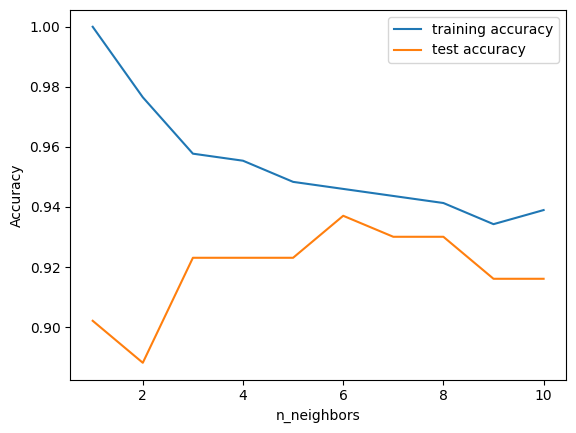

In [4]:

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


The plot illustrates the impact of varying the number of neighbors (n_neighbors) on the training and test set accuracy. It reveals the trade-off between model complexity and performance. With one neighbor, the model is too complex (overfitting), leading to perfect training accuracy but lower test accuracy. Conversely, with 10 neighbors, the model is too simple (underfitting), resulting in poor performance. The optimal balance is achieved with around six neighbors, providing the best accuracy. The plot also emphasizes that real-world plots may not be perfectly smooth. The worst observed performance is approximately 88%, potentially deemed acceptable for the specific context.

****k-neighbors regression****

There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s
start by using the single nearest neighbor, this time using the wave dataset. We’ve
added three test data points as green stars on the x-axis. The prediction using a single
neighbor is just the target value of the nearest neighbor.

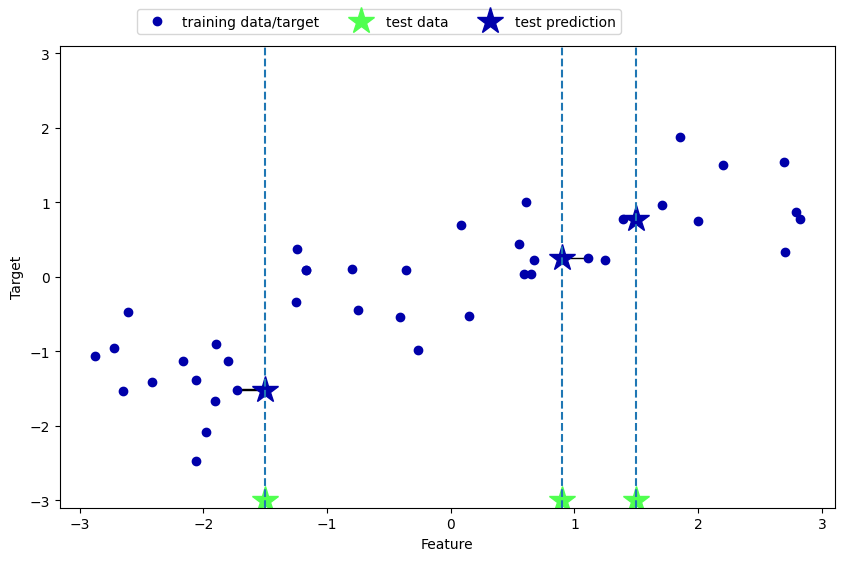

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Again, we can use more than the single closest neighbor for regression. When using
multiple nearest neighbors, the prediction is the average, or mean, of the relevant
neighbors

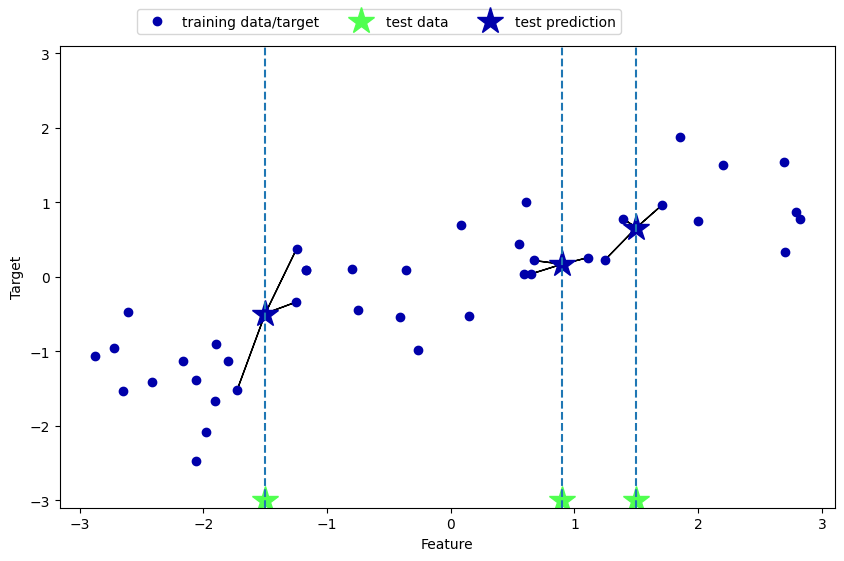

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn. It’s used similarly to KNeighborsClassifier:

In [7]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [8]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [9]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Analyzing KNeighborsRegressor

For our one-dimensional dataset, we can see what the predictions look like for all
possible feature values . To do this, we create a test dataset consisting of
many points on the line:

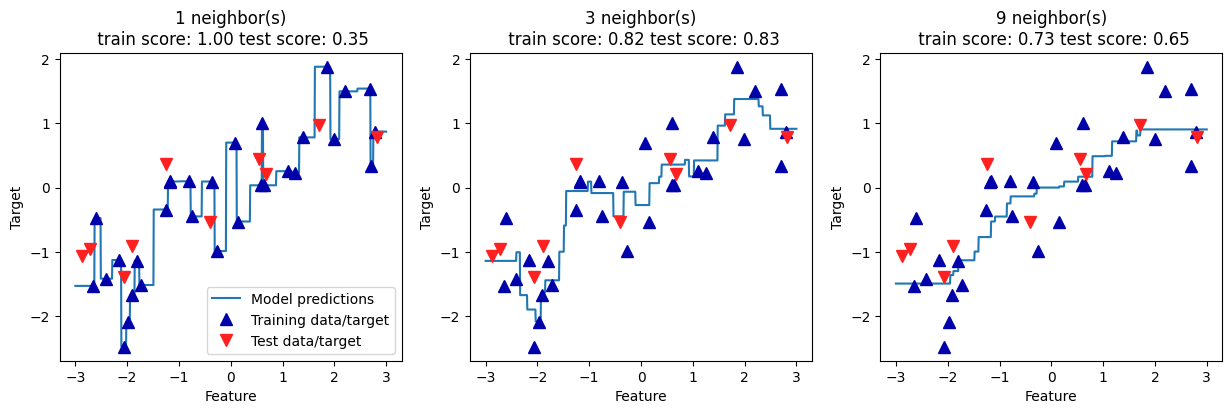

In [10]:
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")


As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.


In principle, there are two important parameters to the KNeighbors classifier: the
number of neighbors and how you measure distance between data points. In practice,
using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. Choosing the right distance measure is somewhat
beyond the scope of this book. By default, Euclidean distance is used, which works
well in many settings

The k-NN algorithm possesses the strength of simplicity, making it easy to understand and providing reasonable performance with minimal adjustments. It serves as a robust baseline method before considering more advanced techniques. While building the nearest neighbors model is typically fast, prediction can become slow when dealing with large training sets, either in terms of features or samples. Preprocessing of data, as discussed in Chapter 3, is crucial when employing k-NN. However, its performance tends to degrade on datasets with numerous features (hundreds or more) and performs poorly on sparse datasets where most features are 0 most of the time.

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used
in practice, due to prediction being slow and its inability to handle many features